In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ, assemble
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_bloch_vector
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time
from math import sqrt, pi
import random

In [2]:
IBMQ.active_account()
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Circuits Design

### CHSH

In [3]:
def make_chsh_circuit(theta = (np.pi)/4):
    chsh_circuits = []

    obs_vec = ['00', '01', '10', '11']
    for el in obs_vec:
        qc = QuantumCircuit(2,2)
        qc.h(0)
        qc.cx(0, 1)
        if el[0] == '1':
            qc.h(0)
        if el[1] == '1':
            qc.ry(theta, 1)
        else:
            qc.ry(-theta, 1)
        qc.measure(range(2),range(2))
        chsh_circuits.append(qc)

    return chsh_circuits  

In [4]:
my_chsh_circuits = make_chsh_circuit()

#### We have these circuits

For the observable $\left| 00 \right\rangle$

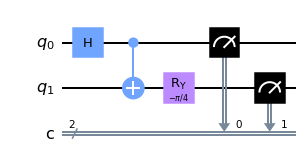

In [6]:
my_chsh_circuits[0].draw(output='mpl')

For the observable $\left| 01 \right\rangle$

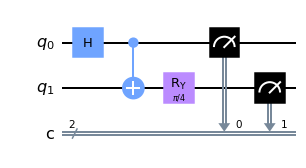

In [6]:
my_chsh_circuits[1].draw(output='mpl')

For the observable $\left| 10 \right\rangle$

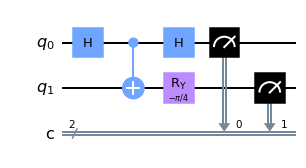

In [7]:
my_chsh_circuits[2].draw(output='mpl')

For the observable $\left| 11 \right\rangle$

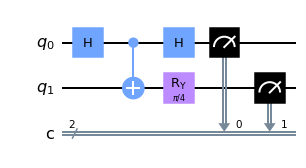

In [8]:
my_chsh_circuits[3].draw(output='mpl')

## Simulation

#### Local AER Simulator:

In [26]:
sim = Aer.get_backend('aer_simulator')

For the observable $\left| 00 \right\rangle$

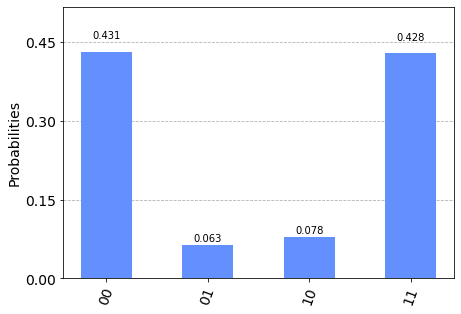

In [31]:
job = sim.run(my_chsh_circuits[0], shots=1000)
result = job.result()
counts = result.get_counts(my_chsh_circuits[0])
plot_histogram(counts)

For the observable $\left| 01 \right\rangle$

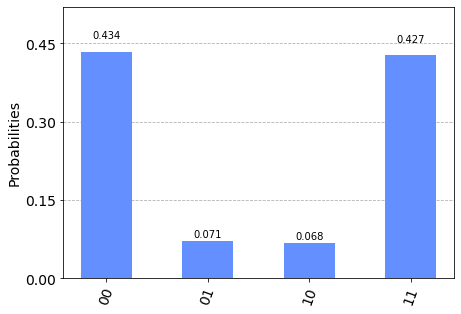

In [32]:
job = sim.run(my_chsh_circuits[1], shots=1000)
result = job.result()
counts = result.get_counts(my_chsh_circuits[1])
plot_histogram(counts)

For the observable $\left| 10 \right\rangle$

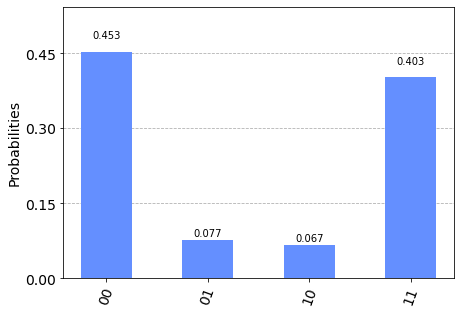

In [33]:
job = sim.run(my_chsh_circuits[2], shots=1000)
result = job.result()
counts = result.get_counts(my_chsh_circuits[2])
plot_histogram(counts)

For the observable $\left| 11 \right\rangle$

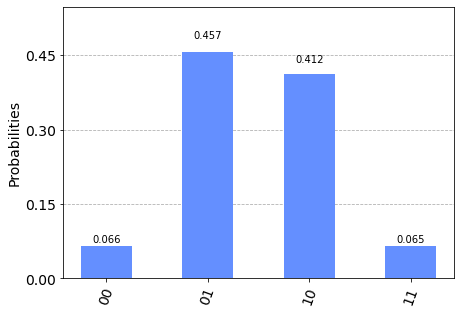

In [34]:
job = sim.run(my_chsh_circuits[3], shots=1000)
result = job.result()
counts = result.get_counts(my_chsh_circuits[3])
plot_histogram(counts)

#### Remote cuantum computer for IBM QUITO: 

In [5]:
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

In [6]:
tic = time.time()
transpiled_circuits = transpile(my_chsh_circuits[0], quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
1558.5426588058472


For the observable $\left| 00 \right\rangle$

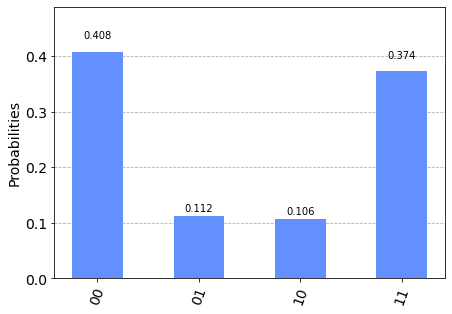

In [7]:
counts = result_real.get_counts()
plot_histogram(counts)

In [8]:
tic = time.time()
transpiled_circuits = transpile(my_chsh_circuits[1], quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
19.725685358047485


For the observable $\left| 01 \right\rangle$

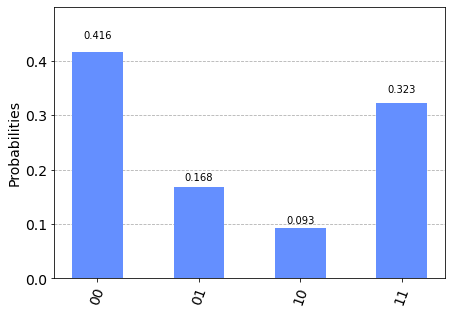

In [9]:
counts = result_real.get_counts()
plot_histogram(counts)

In [10]:
tic = time.time()
transpiled_circuits = transpile(my_chsh_circuits[2], quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
21.987337827682495


For the observable $\left| 10 \right\rangle$

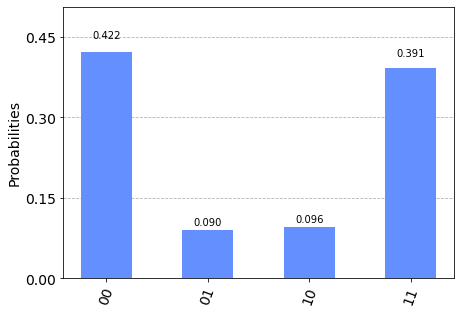

In [11]:
counts = result_real.get_counts()
plot_histogram(counts)

In [12]:
tic = time.time()
transpiled_circuits = transpile(my_chsh_circuits[3], quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

print(toc-tic)

Job Status: job has successfully run
19.920981407165527


For the observable $\left| 11 \right\rangle$

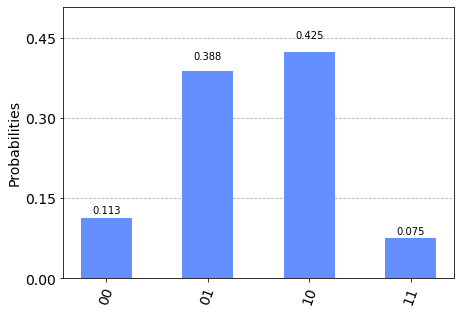

In [13]:
counts = result_real.get_counts()
plot_histogram(counts)

# Hidden Machine Game

### Hidden Machine Circuit Function for 4 Qubits

In [18]:
def hiddenMatchingGame (inputs, measure):
    
    Aqubits = QuantumRegister(2)
    Bqubits = QuantumRegister(2)
    classical = ClassicalRegister(5)
    quantum_circuit = QuantumCircuit(Aqubits, Bqubits, classical)

    quantum_circuit.initialize([1,0], Aqubits[0])
    quantum_circuit.initialize([1,0], Aqubits[1])
    quantum_circuit.initialize([1,0], Bqubits[0])
    quantum_circuit.initialize([1,0], Bqubits[1])

    quantum_circuit.h(Aqubits[0])
    quantum_circuit.h(Aqubits[1])
    quantum_circuit.cx(0, Bqubits[0])
    quantum_circuit.cx(1, Bqubits[1])
    
    #ALICE PART
    
    matrix = Operator([[(-1)**inputs[0], 0, 0, 0], 
                        [0, (-1)**inputs[1], 0, 0],
                        [0, 0, (-1)**inputs[2], 0],
                        [0, 0, 0, (-1)**inputs[3]]])
    
    quantum_circuit.unitary(matrix, [Aqubits[0], Aqubits[1]], label="Phase Gate")
        
    #BOB PART

    if(measure == 1):
        quantum_circuit.measure(Bqubits[1],4)
    elif (measure == 2):
        quantum_circuit.measure(Bqubits[0],4)
    elif(measure == 3):
        quantum_circuit.cx(Bqubits[0],3)
        quantum_circuit.measure(Bqubits[1],4)
        quantum_circuit.cx(Bqubits[0],3)

    h2 = Operator([[0.5, 0.5, 0.5, 0.5], 
                        [0.5, -0.5, 0.5, -0.5],
                        [0.5, 0.5, -0.5, -0.5],
                        [0.5, -0.5, -0.5, 0.5]])
    
    quantum_circuit.unitary(h2, [Aqubits[0], Aqubits[1]], label="H2")
    quantum_circuit.unitary(h2, [Bqubits[0], Bqubits[1]], label="H2")
   
    quantum_circuit.save_statevector()

    quantum_circuit.measure(range(4),range(4))
    
    return quantum_circuit

Inputs represents the 4 classical imputs for Alice and measure represent the measure option of Bob

Measure Case 1

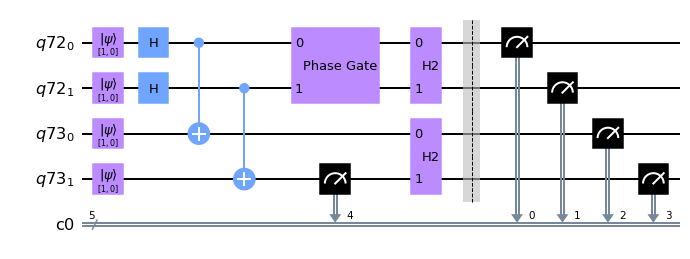

In [19]:
inputs = [1,1,0,1]
measure = 1

quantum_circuit = hiddenMatchingGame(inputs, measure)
quantum_circuit.draw(output='mpl')

Measure Case 2

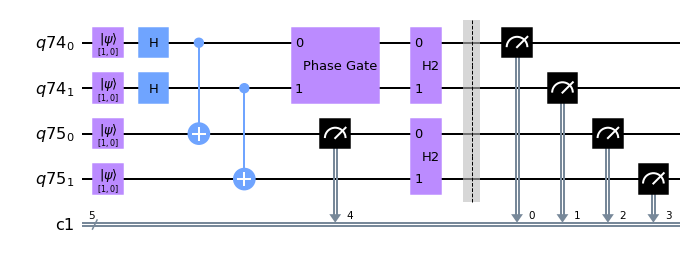

In [20]:
inputs = [1,1,0,1]
measure = 2

quantum_circuit = hiddenMatchingGame(inputs, measure)
quantum_circuit.draw(output='mpl')

Measure Case 3

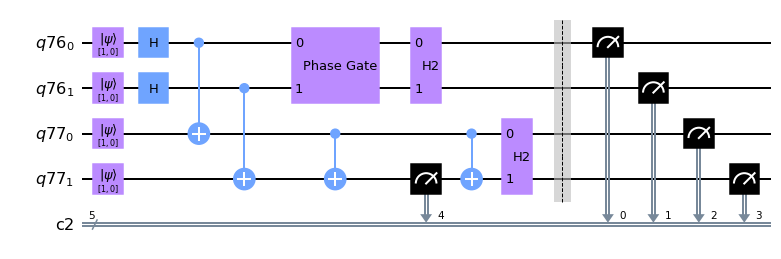

In [21]:
inputs = [1,1,0,1]
measure = 3

quantum_circuit = hiddenMatchingGame(inputs, measure)
quantum_circuit.draw(output='mpl')

In [35]:
def inp_mod2(x, y):
# Computes the inner product modulo 2 of two integers (interpreted as two bitstrings)
# it first makes the bitwise xor and then counts the number of 1s in the result, modulo 2 
    return bin(x&y).count("1")%2

def isWin(y,inputs, measure):
# y is a vector with the measurements that Alice and Bob obtained:
#   in order a0, a1, b0, b1, and Bob's matching element
# inputs are alice's inputs
# measure are bob's measutement instructions (given by the matching)
#
# In this function we recover all information needed to asess if players win or lose.
# From the paper, they win if: (a xor b) inner product (i xor j) == x_i xor x_j   (all modulo 2)
    
    # First recover i,j according to measure and y[4]
    i = 0 
    j = 0
    if(measure == 1):
        if(y[4]==0):
            i=0
            j=1
        else:
            i=2
            j=3
    elif (measure == 2):
        if(y[4]==0):
            i=0
            j=2
        else:
            i=1
            j=3    
    elif(measure == 3):
        if(y[4]==0):
            i=0
            j=3
        else:
            i=1
            j=2
            
    # Now recover x_i and x_j
    xi = inputs[i]
    xj = inputs[j]
    
    # Put a and b into integers (don't know if there is a more elegant method)
    a = int('%d%d' %(y[3],y[2]),2)
    b = int('%d%d' %(y[1],y[0]),2)
    
    # Now do (a xor b) inner product (i xor j) == x_i xor x_j   (all modulo 2)
    
    win = inp_mod2(a^b,i^j) == xi^xj
    
    return win

In [36]:
sim = Aer.get_backend('aer_simulator')

In [38]:
inputs = [1,0,0,1]
measure = 1

quantum_circuit = hiddenMatchingGame(inputs, measure)

job = sim.run(quantum_circuit, shots=1000)
result = job.result()
counts = result.get_counts(quantum_circuit)

lAnswer = [(k[::-1],v) for k,v in counts.items()]
Y = []
for k, v in lAnswer: Y.append( [ int(c) for c in k ] )

for i in range(16): 
    print(isWin(Y[i],inputs,measure))    
    
print("\nNonzero elements in state vector:")
print(np.where(np.around(result.get_statevector(),3)!=0))
print("\nSign of elements in state vector:")
print(np.sign(np.real(result.get_statevector())))
print("\nElements in state vector:")
print(np.around(np.real(result.get_statevector()),1))
Y.sort()
Y[::2]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

Nonzero elements in state vector:
(array([ 1,  3,  4,  6,  9, 11, 12, 14]),)

Sign of elements in state vector:
[ 1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.]

Elements in state vector:
[ 0.   0.4 -0.  -0.4  0.4  0.  -0.4 -0.  -0.  -0.4  0.   0.4 -0.4 -0.
  0.4  0. ]


[[0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 1, 0]]

In [39]:
def hiddenMatchingGameTest(epocs):
    results = []
    goodResults = 0
    badResults = 0
    lastBadResults = 0
    successfulEpoc = 0
    for i in range(epocs):
        lastBadResults = badResults
        inputs = [random.randrange(0,2),random.randrange(0,2),random.randrange(0,2),random.randrange(0,2)]
        measure = random.randrange(0,4)        

        quantum_circuit = hiddenMatchingGame(inputs, measure)
        
        job = sim.run(quantum_circuit, shots=1000)
        result = job.result()
        counts = result.get_counts(quantum_circuit)
        
        lAnswer = [(k[::-1],v) for k,v in counts.items()]
        Y = []
        for k, v in lAnswer: Y.append( [ int(c) for c in k ] )

        for i in range(len(Y)): 
            #print(isWin(Y[i],inputs,measure, False))
            if isWin(Y[i],inputs,measure):
                results.append(1)
                goodResults += 1
            else:
                badResults += 1
                results.append(0)
        if(lastBadResults <= badResults):
            successfulEpoc += 1

    print("Number of epochs= ",epocs, "\nNumber of epochs with 100% of success= ",successfulEpoc,"\n% of accuracy= ", np.around(100 * (goodResults/(goodResults+badResults)), decimals = 4),"%" "\n\n number of correct resutls: ", goodResults, "\n Number of wrong results: ", badResults)
    #return results

In [40]:
hiddenMatchingGameTest(500)

Number of epochs=  500 
Number of epochs with 100% of success=  500 
% of accuracy=  100.0 %

 number of correct resutls:  7388 
 Number of wrong results:  0
